<div style="background-color: #CC2EFA; padding: 10px;">
   <font size="10"> 0| Introdução</font>

    Neste Dataset iremos analisar os salarios de profissões relacionadas com (data). Com foco em vários aspectos da area, incluindo experiência profissional, cargos e localizações da empresa, este conjunto de dados fornece informações valiosas sobre as distribuições salariais no setor. 
</div>

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Diretamente do Kaggle, vamos importar o dataset para fazermos nossa analise. 

df = pd.read_csv('/kaggle/input/data-science-salary-2021-to-2023/Data Science Salary 2021 to 2023.csv')

# 1- Vamos analisar os dados e as caracteristicas desse dataset

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [37]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [38]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


Finalmente vamos checar para ver se não há nenhum dado nulo para que não atrapalhe nossa analise

In [39]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

# 2- agora para facilitar o entendimento e a criação dos proximos passos, vamos deixar as colunas com os nomes traduzidos para maior compreensão 

Aqui renomeamos os dados da coluna "experience_level" que futuramente será traduzida tambem

In [40]:
df['experience_level'] = df['experience_level'].replace('EN', 'Junior')
df['experience_level'] = df['experience_level'].replace('EX', 'Experiente')
df['experience_level'] = df['experience_level'].replace('MI', 'Nivel_medio')
df['experience_level'] = df['experience_level'].replace('SE', 'Senior')

Aqui iremos renomear o tipo de contrato

In [41]:
df['employment_type'] = df['employment_type'].replace('FT', 'Full-Time')
df['employment_type'] = df['employment_type'].replace('CT', 'Contratante')
df['employment_type'] = df['employment_type'].replace('FL', 'Freelancer')
df['employment_type'] = df['employment_type'].replace('PT', 'Meio_periodo')

Nesse renomearemos os tamanhos da empresa 

In [42]:
df['company_size'] = df['company_size'].replace('L', "Grande")
df['company_size'] = df['company_size'].replace('M', "Media")
df['company_size'] = df['company_size'].replace('S', "Pequena")

Os dados das colunas já foram traduzidos acima, agora é a hora de traduzirmos os nomes das colunas

In [43]:
df = df.rename(columns={'work_year': 'ano_trabalho','experience_level':'nivel_experiencia', 'employment_type':'tipo_vaga'})
df = df.rename(columns ={'job_title':'titulo_emprego','salary':'salario', 'salary_currency': "moeda_pagamento"})
df = df.rename(columns={'salary_in_usd':'salario_em_dolares', 'company_location':'lugar_empresa', 'company_size': 'tamanho_empresa'})


Abaixo veremos como podemos customizar todos os aspectos de visualização e veremos os nomes todos traduzidos 

In [44]:
styled_df = df.head(5).style.set_properties(**{'background-color': '#8B008B ' ,'color':'white','border-color': '#F5FFFA'})
styled_df.set_table_styles([
    {"selector": "th", "props": [("color", 'white'), ("background-color", "#333333")]}
])

,ano_trabalho,nivel_experiencia,tipo_vaga,titulo_emprego,salario,moeda_pagamento,salario_em_dolares,lugar_empresa,tamanho_empresa
0,2023,Junior,Full-Time,Applied Scientist,213660,USD,213660,US,Grande
1,2023,Junior,Full-Time,Applied Scientist,130760,USD,130760,US,Grande
2,2023,Junior,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Grande
3,2023,Junior,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Grande
4,2023,Junior,Full-Time,Applied Scientist,204620,USD,204620,US,Grande


In [45]:
df.describe()

,ano_trabalho,salario,salario_em_dolares
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [46]:
df.isnull().sum()

ano_trabalho          0
nivel_experiencia     0
tipo_vaga             0
titulo_emprego        0
salario               0
moeda_pagamento       0
salario_em_dolares    0
lugar_empresa         0
tamanho_empresa       0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ano_trabalho        3761 non-null   int64 
 1   nivel_experiencia   3761 non-null   object
 2   tipo_vaga           3761 non-null   object
 3   titulo_emprego      3761 non-null   object
 4   salario             3761 non-null   int64 
 5   moeda_pagamento     3761 non-null   object
 6   salario_em_dolares  3761 non-null   int64 
 7   lugar_empresa       3761 non-null   object
 8   tamanho_empresa     3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


# 3 Agora podemos começar a nossa analise 

Começamos analisando a variação do salario conforme os anos de 2020 a 2023

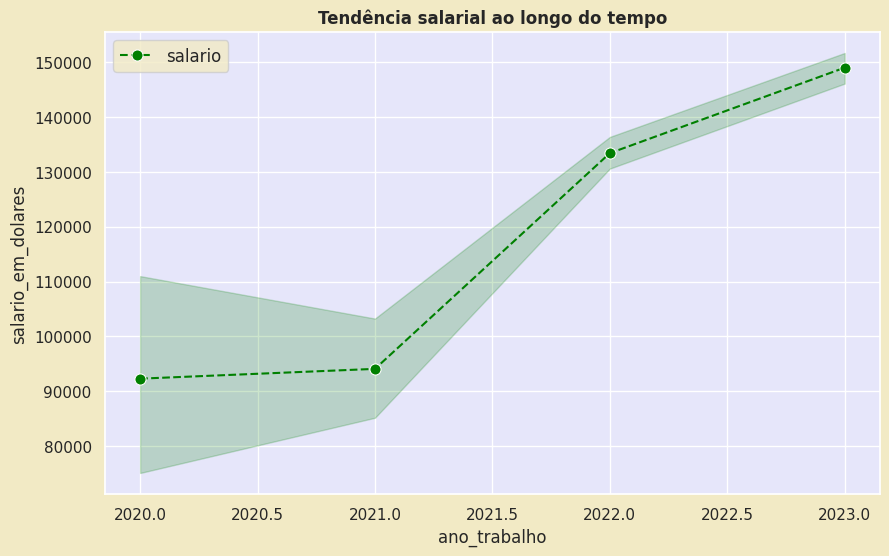

In [48]:
plt.figure(figsize = (10,6))
salary_trend = df[['salario_em_dolares', 'ano_trabalho']].sort_values(by = 'ano_trabalho')
p = sns.lineplot(data =salary_trend ,x = 'ano_trabalho', y = 'salario_em_dolares', marker = 'o',linestyle='--', color='Green', markersize=8 )
plt.title('Tendência salarial ao longo do tempo', fontsize=12, fontweight='bold')

# Customizar cor de fundo
p.set_facecolor("#E6E6FA")
plt.legend(['salario'], loc='best', fontsize=12)

p.grid(True)

plt.show()

Agora podemos ver a evolução do salario conforme o tamanho da empresa, para termos uma melhor compreenção dos valores 

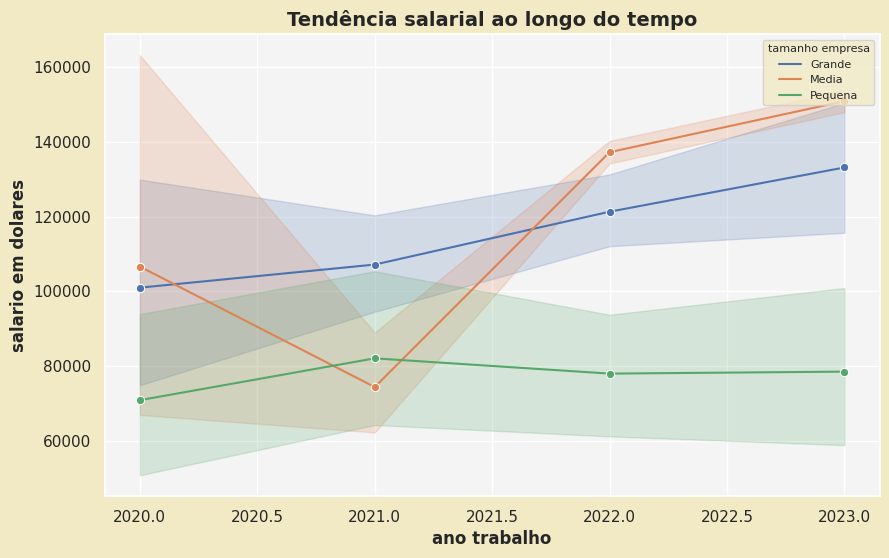

In [49]:
plt.figure(figsize=(10, 6))
p = sns.lineplot(data=df, x='ano_trabalho', y='salario_em_dolares', hue='tamanho_empresa', marker='o')

plt.xlabel('ano trabalho', fontsize=12, fontweight='bold')
plt.ylabel('salario em dolares', fontsize=12, fontweight='bold')

# Adicione a legenda
plt.legend(title='tamanho empresa', title_fontsize=8, fontsize=8, loc='upper right')

# Titulo
plt.title('Tendência salarial ao longo do tempo', fontsize=14, fontweight='bold')


# Customizar cor de fundo
p.set_facecolor("#f4f4f4")

plt.show()

Analisaremos as medias dos salarios de acordo com a experiencia 

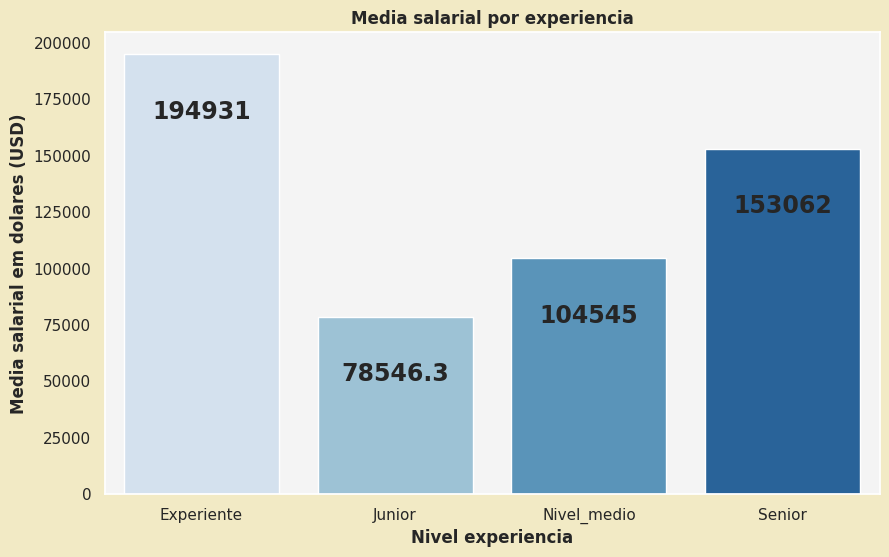

In [50]:
exp_salary = df.groupby('nivel_experiencia')['salario_em_dolares'].mean()
plt.figure(figsize = (10,6))
ax = sns.barplot(x = exp_salary.index, y = exp_salary.values, palette = 'Blues')
plt.title('Media salarial por experiencia', fontsize=12, fontweight='bold')
plt.xlabel('Nivel experiencia', fontsize=12, fontweight='bold')
plt.ylabel('Media salarial em dolares (USD)', fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container,
                padding = -50,
                fontsize = 17,
                label_type="edge",
                fontweight = 'bold'
                
                
                )

# Customizar cor de fundo
ax.set_facecolor("#f4f4f4")

ax.grid(axis='y')

plt.show()

Agora veremos a media do salario por tipo de vaga

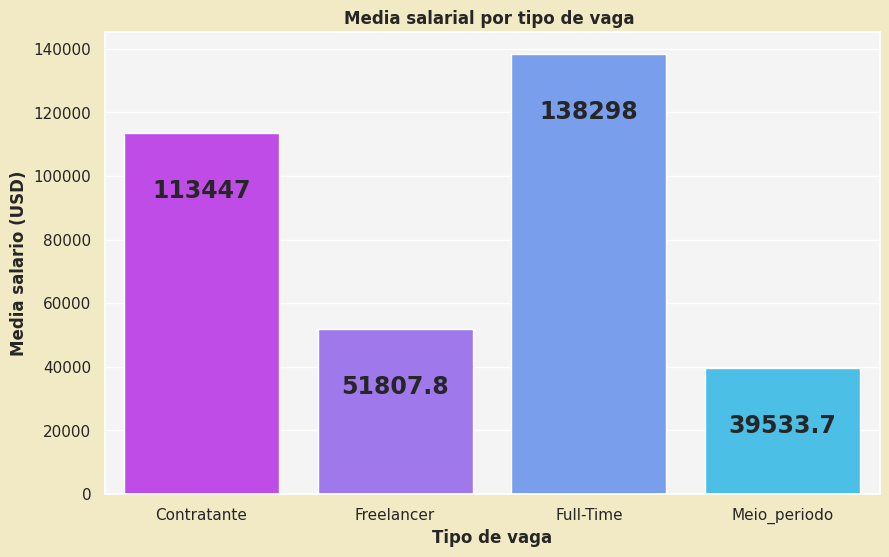

In [51]:
emp_salary = df.groupby('tipo_vaga')['salario_em_dolares'].mean()

plt.figure(figsize = (10,6))
p = sns.barplot(y = emp_salary.values, x = emp_salary.index, palette = 'cool_r')
plt.title('Media salarial por tipo de vaga ', fontsize=12, fontweight='bold')
plt.xlabel('Tipo de vaga', fontsize=12, fontweight='bold')
plt.ylabel('Media salario (USD)', fontsize=12, fontweight='bold')

for container in p.containers:
    plt.bar_label(container,
                padding = -50,
                fontsize = 17,
                #bbox = {'boxstyle': 'rarrow', 'edgecolor': 'red', 'facecolor': 'yellow'},
                label_type="edge",
                fontweight = 'bold',
                #rotation = 90
                      
                 )

p.set_facecolor("#f4f4f4")

ax.grid(axis='y')

plt.show()

O top10 das maiores medias salariais 

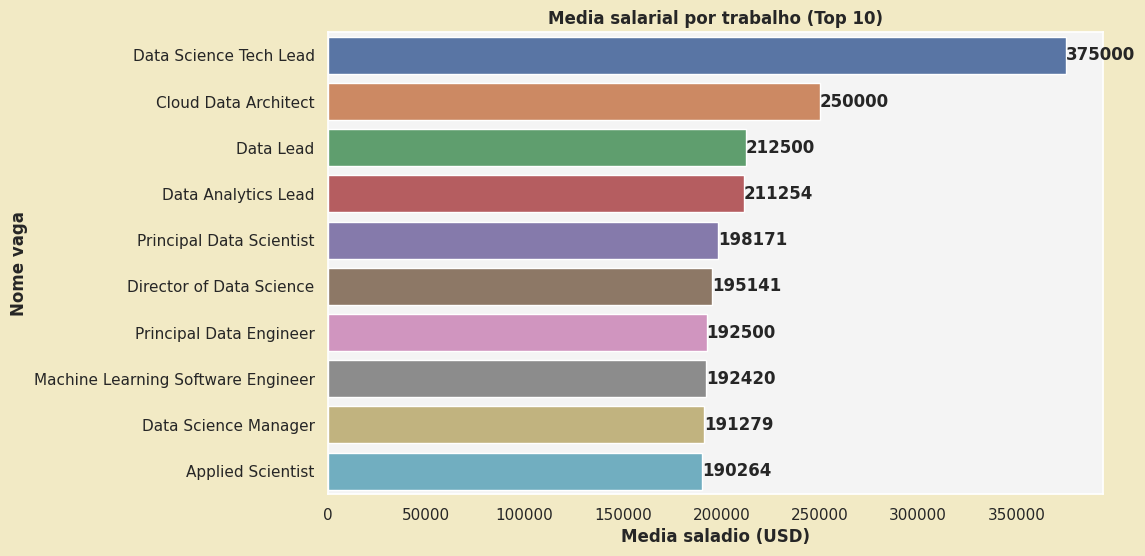

In [52]:
# Agrupe os dados por 'cargo_título' e calcule o salário médio de cada cargo
job_title_salary= df.groupby('titulo_emprego')['salario_em_dolares'].mean().sort_values(ascending = False)

plt.figure(figsize = (10,6))
p = sns.barplot(x= job_title_salary.values[:10], y = job_title_salary.index[:10])

plt.title('Media salarial por trabalho (Top 10)', fontsize=12, fontweight='bold')
plt.xlabel('Media saladio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Nome vaga', fontsize=12, fontweight='bold')

for container in p.containers:
    p.bar_label(container,
                fontweight = 'bold'
                
               
               )
p.set_facecolor("#f4f4f4")

p.grid(False)
plt.show()

Analisaremos a media do salario de acordo com o dolar, para vermos quais são os locais com o melhor pagamento 

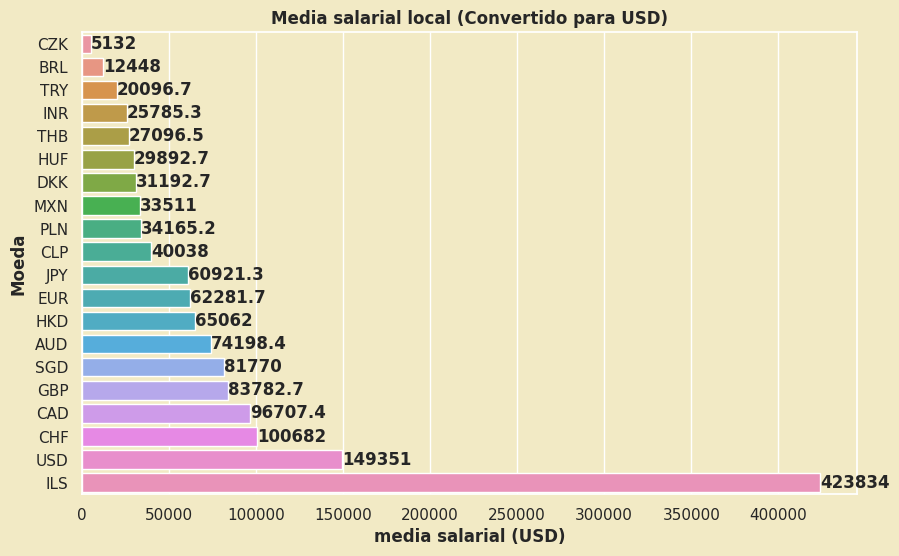

In [53]:
# Group data by 'salary_currency' and calculate the average salary in USD for each currency
currency_salary  = df.groupby('moeda_pagamento')['salario_em_dolares'].mean()

# Ordene os valores da variável 'currency_salary' em ordem crescente
currency_salary = currency_salary.sort_values()

# Crie um gráfico de barras
plt.figure(figsize=(10, 6))
p = sns.barplot(x=currency_salary.values, y=currency_salary.index)
sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

# Adicione rótulos às barras
for container in p.containers:
    p.bar_label(container, fontweight='bold')

# Personalize o título, rótulos dos eixos e cor de fundo do gráfico
plt.title('Media salarial local (Convertido para USD)', fontsize=12, fontweight='bold')
plt.xlabel('media salarial (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Moeda', fontsize=12, fontweight='bold')
plt.show()

Veremos abaixo a media do salario por tamanho da empresa 

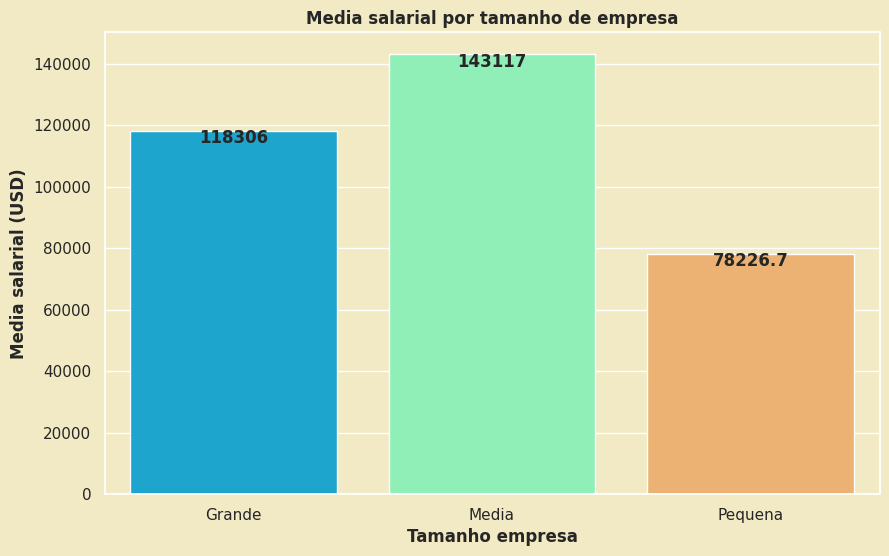

In [54]:
company_size_salary = df.groupby('tamanho_empresa')['salario_em_dolares'].mean()

# Trace o salário médio por tamanho da empresa
plt.figure(figsize=(10, 6))
p = sns.barplot(x=company_size_salary.index, y=company_size_salary.values, palette = 'rainbow')
plt.title('Media salarial por tamanho de empresa', fontsize=12, fontweight='bold')
plt.xlabel('Tamanho empresa',fontsize=12, fontweight='bold')
plt.ylabel('Media salarial (USD)', fontsize=12, fontweight='bold')


for container in p.containers:
    p.bar_label(container, fontweight = 'bold',
                padding = -12,
                fontsize=12,
                
               )


plt.show()

Podemos abaixo analisar a distribuição do salario para profissionais em data science 

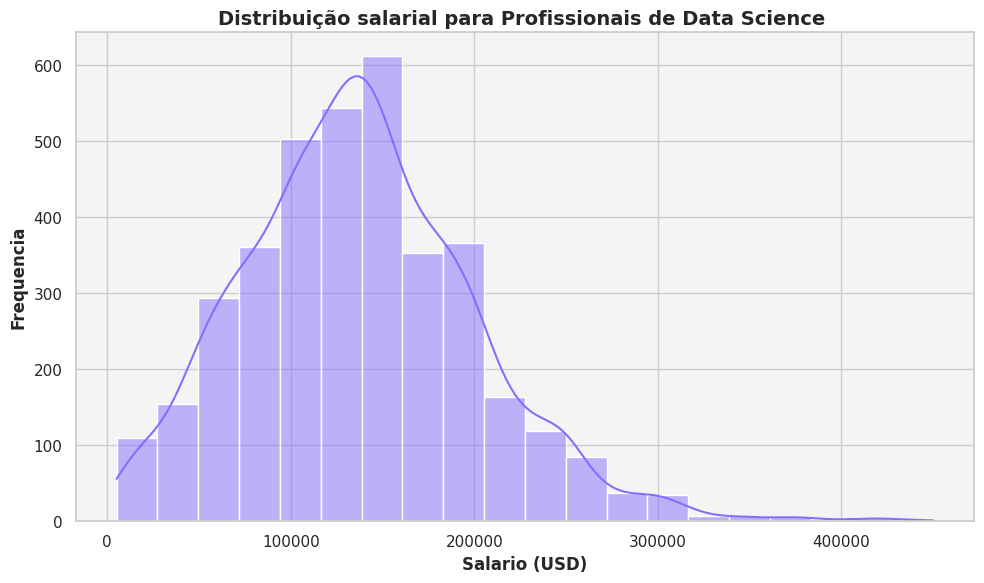

In [55]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(df['salario_em_dolares'], kde=True, color='#836FFF', bins=20, ax=ax)

# personalizar rótulos e títulos
ax.set_title('Distribuição salarial para Profissionais de Data Science ', fontsize=14, fontweight='bold')
ax.set_xlabel('Salario (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Frequencia', fontsize=12, fontweight='bold')

ax.tick_params(axis='y', which='both', left=False)

ax.set_facecolor("#f4f4f4")

plt.tight_layout()
plt.show()

Neste grafico a seguir podemos mudar o range do salario e experiencia para analisarmos como quisermos para saber quantas vagas possui com a experiencia e o salario desejado

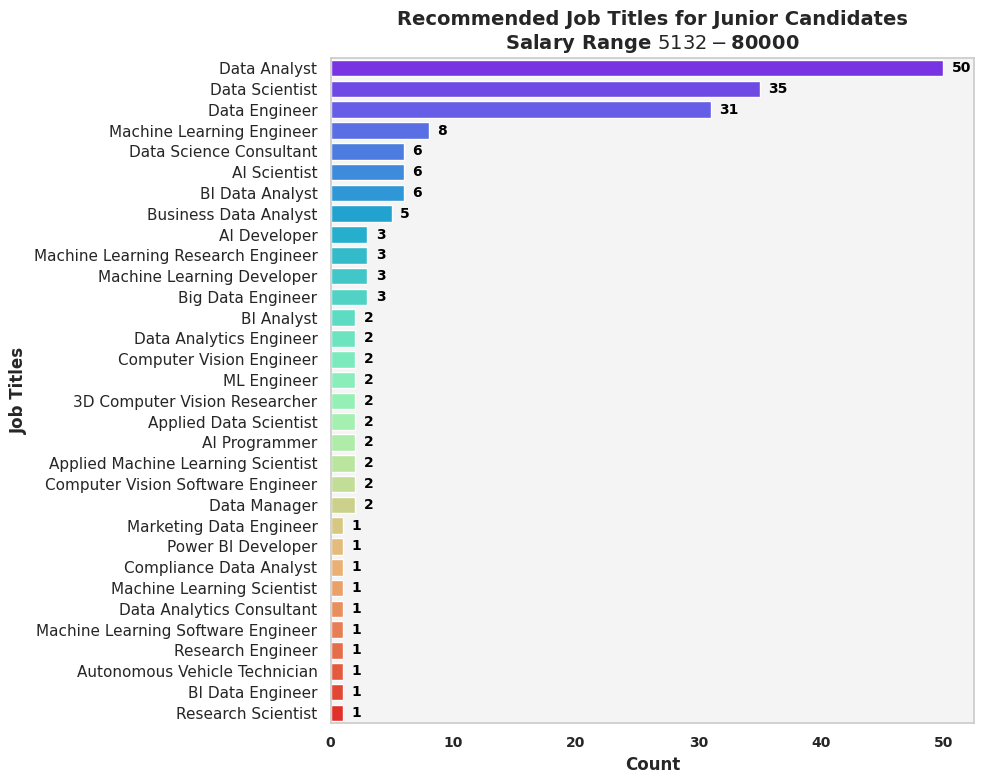

In [56]:
# Defina os critérios do candidato
desired_experience_level = 'Junior'
desired_salary_range = (5132, 80000)  # Replace with the desired salary range in USD

# Filtre o conjunto de dados com base no nível de experiência e faixa salarial desejada
filtered_df = df[(df['nivel_experiencia'] == desired_experience_level) &
                 (df['salario_em_dolares'] >= desired_salary_range[0]) &
                 (df['salario_em_dolares'] <= desired_salary_range[1])]

# Conte as ocorrências de cada cargo
job_title_counts = filtered_df['titulo_emprego'].value_counts().reset_index()
job_title_counts.columns = ['Job Title', 'Count']

# Crie um gráfico de barras horizontais usando Seaborn com uma paleta de cores diferente
plt.figure(figsize=(10, 8))



ax = sns.barplot(x='Count', y='Job Title', data=job_title_counts, palette = 'rainbow')
plt.xlabel('Count', fontsize=12, fontweight='bold')
plt.ylabel('Job Titles', fontsize=12, fontweight='bold')
plt.title(f'Recommended Job Titles for {desired_experience_level} Candidates\nSalary Range ${desired_salary_range[0]} - ${desired_salary_range[1]}', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=10, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=10,)
                 #bbox={'boxstyle': 'circle,pad=0.3', 'facecolor': 'yellow', 'edgecolor': 'black'})

ax.set_facecolor("#f4f4f4")

ax.grid(False)

plt.tight_layout()
plt.show()

Calcule o salário médio para cada combinação de nível de experiência e tipo de emprego

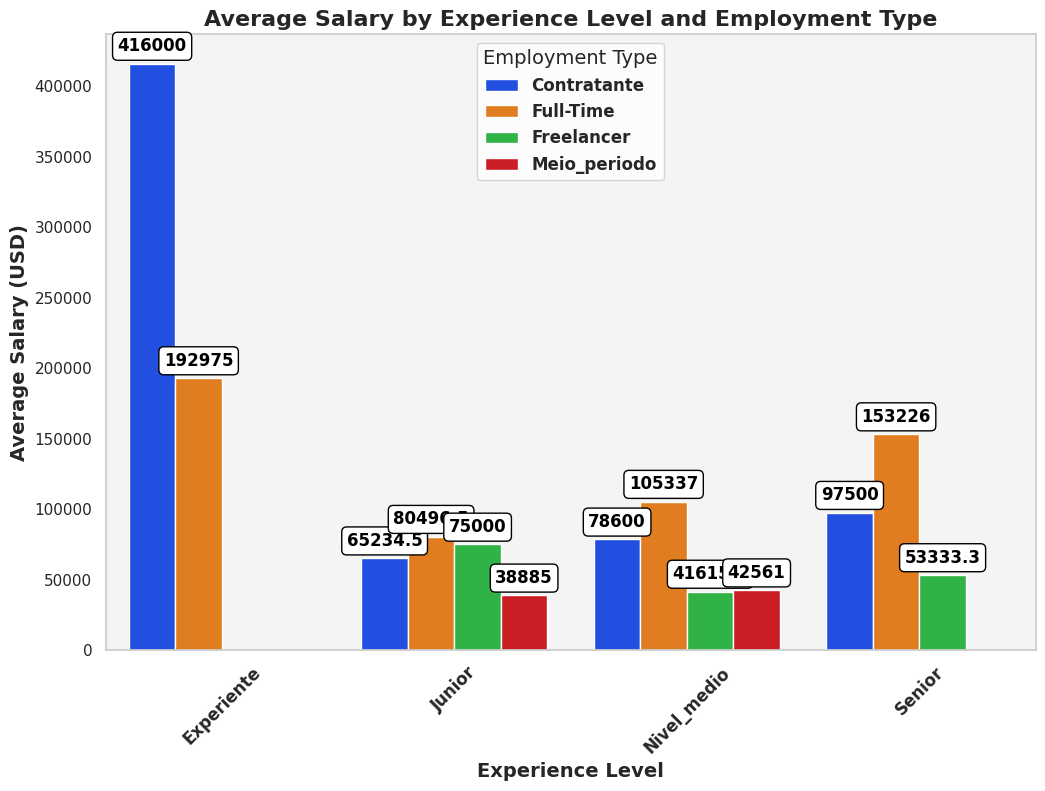

In [57]:
# Calcule o salário médio para cada combinação de nível de experiência e tipo de emprego
cost_effectiveness = df.groupby(['nivel_experiencia', 'tipo_vaga'])['salario_em_dolares'].mean().reset_index()

# Encontre a combinação com o maior salário médio (custo-benefício máximo)
best_combination = cost_effectiveness.loc[cost_effectiveness['salario_em_dolares'].idxmax()]

# Crie um gráfico de barras usando Seaborn com os eixos x e y trocados
plt.figure(figsize=(12, 8))

sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='nivel_experiencia', y='salario_em_dolares', hue='tipo_vaga', data=cost_effectiveness)
plt.xlabel('Experience Level', fontsize=14, fontweight='bold')
plt.ylabel('Average Salary (USD)', fontsize=14, fontweight='bold')
plt.title('Average Salary by Experience Level and Employment Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12, fontweight='bold')

for container in ax.containers:
    ax.bar_label(container, label_type="edge", color="black",
                 padding=6,
                 fontweight='bold',
                 fontsize=12,
                 bbox={'boxstyle': 'round,pad=0.3', 'facecolor': 'white', 'edgecolor': 'black'})

legend = plt.legend(title='Employment Type', fontsize=12, title_fontsize=14)
for text in legend.get_texts():
    text.set_fontweight('bold')

ax.set_facecolor("#f4f4f4")

ax.grid(axis='y')

plt.show()

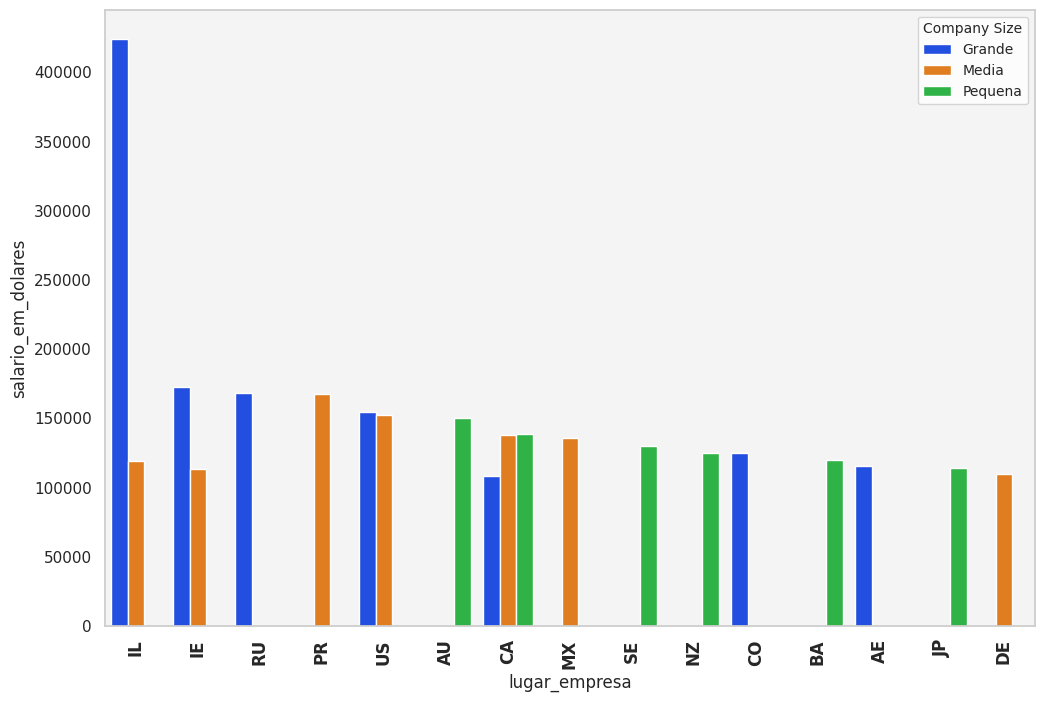

In [58]:
cost_effectiveness = df.groupby(['lugar_empresa', 'tamanho_empresa'])['salario_em_dolares'].mean().reset_index().sort_values(by = 'salario_em_dolares', ascending = False)[:20]

# Encontre a combinação com o maior salário médio (custo-benefício máximo)
best_combination = cost_effectiveness.loc[cost_effectiveness['salario_em_dolares'].idxmax()]

# Crie um gráfico de barras usando Seaborn com os eixos x e y trocados
plt.figure(figsize=(12, 8))

sns.set_palette(sns.color_palette('bright'))

ax = sns.barplot(x='lugar_empresa', y='salario_em_dolares', hue='tamanho_empresa', data=cost_effectiveness)
plt.xticks(rotation=90, fontsize=12, fontweight='bold')

lg = plt.legend(title='Company Size', title_fontsize=10, fontsize=10, loc='upper right')

ax.set_facecolor("#f4f4f4")

ax.grid(axis='y')

plt.show()

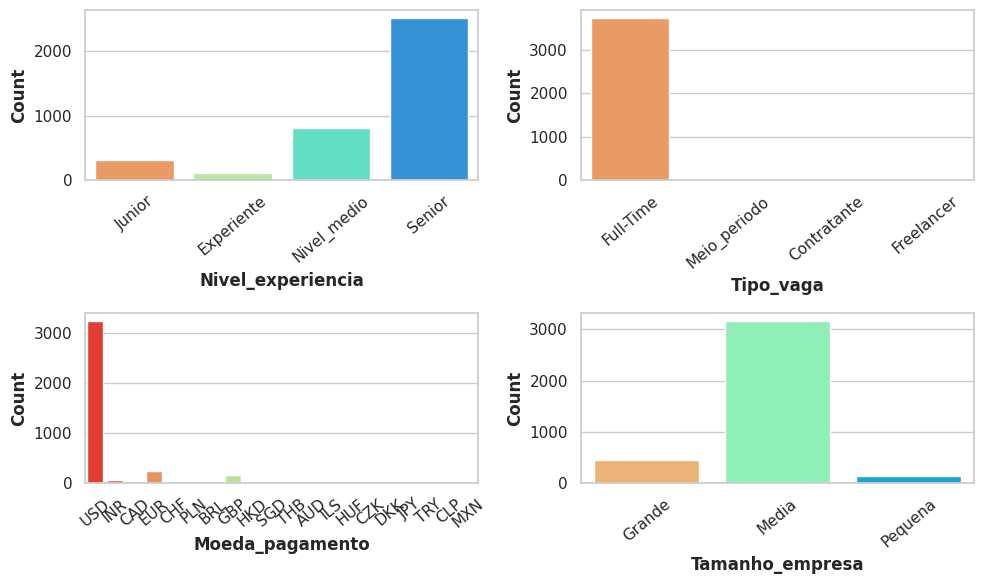

In [59]:
fig, axis = plt.subplots(2, 2, figsize=(10, 6))
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})

columns = ['nivel_experiencia', 'tipo_vaga', 'moeda_pagamento', 'tamanho_empresa']
axis = axis.flatten()
for i, col in enumerate(columns):
    p = sns.countplot(data=df, x=df[col], ax=axis[i], palette= "rainbow_r")
    axis[i].set_xticklabels(axis[i].get_xticklabels(), rotation=40)
    axis[i].set_xlabel(col.capitalize(), fontsize=12, fontweight='bold')
    axis[i].set_ylabel('Count', fontsize=12, fontweight='bold')

# Remova quaisquer subparcelas vazias restantes
for j in range(len(columns), len(axis)):
    fig.delaxes(axis[j])

    
plt.tight_layout()
plt.show()

# 4 Vamos criar agora modelos de Machine learning

Vamos relembrar os dados do nosso dataset

In [60]:
df.head()

,ano_trabalho,nivel_experiencia,tipo_vaga,titulo_emprego,salario,moeda_pagamento,salario_em_dolares,lugar_empresa,tamanho_empresa
0,2023,Junior,Full-Time,Applied Scientist,213660,USD,213660,US,Grande
1,2023,Junior,Full-Time,Applied Scientist,130760,USD,130760,US,Grande
2,2023,Junior,Full-Time,Data Quality Analyst,100000,USD,100000,NG,Grande
3,2023,Junior,Full-Time,Compliance Data Analyst,30000,USD,30000,NG,Grande
4,2023,Junior,Full-Time,Applied Scientist,204620,USD,204620,US,Grande


Usamos o módulo "*sklearn.preprocessing*" para codificar colunas categóricas em um dataframe.

Primeiro, o código identifica as colunas categóricas no dataframe usando a função "*select_dtypes()*".
Em seguida, o código inicializa o "*LabelEncoder()*".
Por fim, o código aplica a codificação de rótulo a cada coluna categórica usando um loop for.
A codificação de rótulo é um processo que transforma os valores de uma coluna categórica em números inteiros, como podemos ver acima na coluna "tamanho_empresa" na qual possui 3 valores "Pequena, Media e Grande", para que possamos gerar um modelo a partir desses dados, precisamos transforma-los em variaveis numericas. 

In [61]:
from sklearn.preprocessing import LabelEncoder

# Identifique colunas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Inicializar o LabelEncoder
label_encoder = LabelEncoder()

# Aplicar codificação de rótulo a cada coluna categórica
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

Ao chamar a tabela abaixo, podemos ver que agora todos os dados são numericos, para que não haja nenhum problema na geração dos modelos a seguir. 

In [62]:
df

,ano_trabalho,nivel_experiencia,tipo_vaga,titulo_emprego,salario,moeda_pagamento,salario_em_dolares,lugar_empresa,tamanho_empresa
0,2023,1,2,8,213660,19,213660,70,0
1,2023,1,2,8,130760,19,130760,70,0
2,2023,1,2,41,100000,19,100000,53,0
3,2023,1,2,22,30000,19,30000,53,0
4,2023,1,2,8,204620,19,204620,70,0
...,...,...,...,...,...,...,...,...,...
3756,2020,3,2,84,130000,7,148261,20,1
3757,2020,3,2,47,80000,7,91237,5,2
3758,2020,3,2,45,190200,19,190200,70,1
3759,2020,3,2,69,40000,7,45618,33,2


Aqui confirmamos que não haja nenhum ruido ou dado errado no nosso dataset

In [63]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ano_trabalho        3761 non-null   int64
 1   nivel_experiencia   3761 non-null   int64
 2   tipo_vaga           3761 non-null   int64
 3   titulo_emprego      3761 non-null   int64
 4   salario             3761 non-null   int64
 5   moeda_pagamento     3761 non-null   int64
 6   salario_em_dolares  3761 non-null   int64
 7   lugar_empresa       3761 non-null   int64
 8   tamanho_empresa     3761 non-null   int64
dtypes: int64(9)
memory usage: 264.6 KB


Usaremos o módulo "*sklearn.preprocessing*" para padronizar os dados em um dataframe.

A padronização é um processo que transforma os dados de forma que todas as variáveis tenham uma média de 0 e um desvio padrão de 1. Isso pode ser útil para algoritmos de aprendizado de máquina que são sensíveis à escala dos dados.
O código usa o método "*fit_transform()*" para padronizar os dados no dataframe df. Este método retorna um novo dataframe com os dados padronizados.

In [64]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_standardized = standard_scaler.fit_transform(df)
df = pd.DataFrame(df_standardized, columns=df.columns)

In [65]:
# Dividindo o dataset

X = df.drop(['salario', 'moeda_pagamento', 'salario_em_dolares'], axis=1)  # Características
y = df['salario_em_dolares']  # Variável de destino

A função train_test_split() do módulo sklearn.model_selection divide um conjunto de dados em dois conjuntos: um conjunto de treinamento e um conjunto de teste.

O conjunto de treinamento é usado para treinar um modelo de aprendizado de máquina, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo.

X: O conjunto de dados de entrada.
y: Os rótulos de saída.
test_size: A fração do conjunto de dados de entrada a ser usada no conjunto de teste. Por padrão, o valor é 0.25, o que significa que 25% dos dados serão usados no conjunto de teste.
random_state: Uma semente aleatória para garantir que a divisão dos dados seja reproduzível.

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

usaremos os módulos "*sklearn.linear_model, sklearn.tree e sklearn.ensemble*" para treinar e avaliar três modelos de regressão:

Regressão linear
Regressão por árvore de decisão
Regressão por floresta aleatória
O código também usa o "*módulo sklearn.metrics*" para calcular as seguintes métricas de avaliação:

Erro quadrático médio (MSE)
Erro quadrático médio de raiz (RMSE)
Erro absoluto médio (MAE)
R-quadrado (R2)
O código funciona da seguinte forma:

Primeiro, o código define uma lista de modelos de regressão que serão usados.
Em seguida, o código entra em um loop para treinar e avaliar cada modelo.
Para treinar cada modelo, o código usa o método fit().
Para avaliar cada modelo, o código usa o método predict() para prever os rótulos do conjunto de teste.
O código então calcula as métricas de avaliação MSE, RMSE, MAE e R2.
Por fim, o código imprime os resultados para cada modelo.

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Definimos a lista de modelos para regressão que usaremos 
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42))
]

# Loop para repetir os modelos 

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print("===================")

Model: Linear Regression
Mean Squared Error: 0.78
Root Mean Squared Error: 0.88
Mean Absolute Error: 0.66
R-squared: 0.24
Model: Decision Tree
Mean Squared Error: 0.69
Root Mean Squared Error: 0.83
Mean Absolute Error: 0.60
R-squared: 0.33
Model: Random Forest
Mean Squared Error: 0.63
Root Mean Squared Error: 0.79
Mean Absolute Error: 0.58
R-squared: 0.39
